In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 4/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


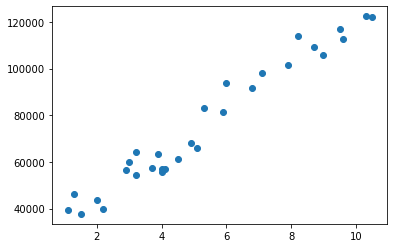

In [6]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

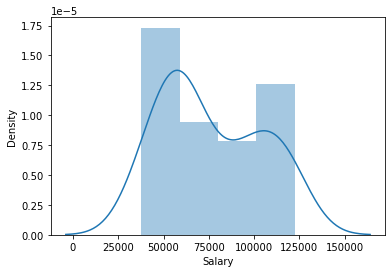

In [11]:
import seaborn as sns
sns.distplot(df["Salary"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

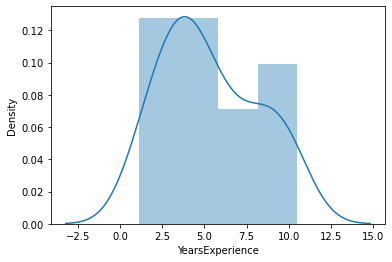

In [25]:
sns.distplot(df["YearsExperience"])

In [57]:
from scipy import stats
import math


# model1: without any trnsformation

In [8]:
import statsmodels.formula.api as smf
model1=smf.ols("Salary~YearsExperience",data=df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

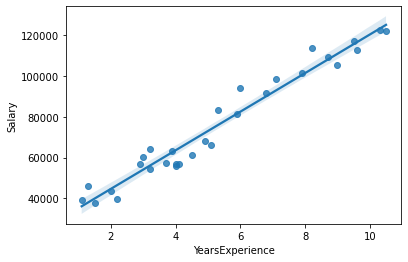

In [9]:
sns.regplot(x="YearsExperience",y="Salary",data=df)

In [19]:
print(model1.rsquared,model1.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        21:27:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# models with Log Tranformation.

In [21]:
# log of salary
model2=smf.ols("np.log(Salary)~YearsExperience",data=df).fit()
print(model2.rsquared,model2.rsquared_adj)

0.9319671194084195 0.9295373736730059


In [23]:
# log of year of experience
model3=smf.ols("Salary~np.log(YearsExperience)",data=df).fit()
print(model3.rsquared,model3.rsquared_adj)

0.8538888828756969 0.8486706286926861


In [27]:
# log of both features
model4=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=df).fit()
print(model4.rsquared,model4.rsquared_adj)

0.9052150725817149 0.9018298966024904


Since r squared and adj r square values getting less we will use onother tranformation

# models with square root Tranformation

In [25]:
model5=smf.ols("Salary~np.sqrt(YearsExperience)",data=df).fit()
print(model5.rsquared,model5.rsquared_adj)

0.9310009544993526 0.9285367028743294


In [28]:
model6=smf.ols("np.sqrt(Salary)~YearsExperience",data=df).fit()
print(model6.rsquared,model6.rsquared_adj)

0.9498353533865289 0.9480437588646192


In [29]:
model7=smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data=df).fit()
print(model7.rsquared,model7.rsquared_adj)

0.9419490138976825 0.9398757643940283


# Predicting for new values 
We will use first model as it has high R square and adj R squared values|

In [35]:
newdata=pd.Series([1.1,2.9,12,12])

In [36]:
datapredict=pd.DataFrame(newdata,columns=["YearsExperience"])
datapredict

,YearsExperience
0,1.1
1,2.9
2,12.0
3,12.0


In [39]:
model1.predict(datapredict)

0     36187.158752
1     53197.090931
2    139191.748056
3    139191.748056
dtype: float64

In [56]:
predicted_salary=np.round(model1.predict(df['YearsExperience']),1)
df2=pd.DataFrame(predicted_salary,columns=['predicted salary'])
df2


,predicted salary
0,36187.2
1,38077.2
2,39967.1
3,44692.1
4,46582.1
5,53197.1
6,54142.1
7,56032.1
8,56032.1
9,60757.1


In [57]:
new_df=pd.concat([df,df2],axis=1)
new_df

,YearsExperience,Salary,predicted salary
0,1.1,39343.0,36187.2
1,1.3,46205.0,38077.2
2,1.5,37731.0,39967.1
3,2.0,43525.0,44692.1
4,2.2,39891.0,46582.1
5,2.9,56642.0,53197.1
6,3.0,60150.0,54142.1
7,3.2,54445.0,56032.1
8,3.2,64445.0,56032.1
9,3.7,57189.0,60757.1


<AxesSubplot:xlabel='YearsExperience'>

<Figure size 21600x504 with 0 Axes>

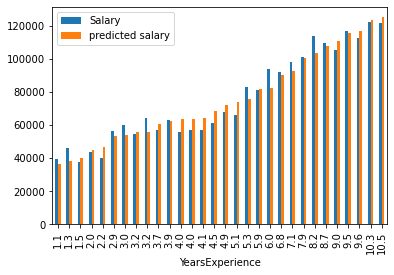

In [61]:
plt.figure(figsize=(300,7))
new_df.plot(x='YearsExperience',y=['Salary','predicted salary'],kind='bar')